In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Helvetica')

# Data Preprocessing

In [2]:
nmf_genes_cancer_df = pd.read_csv('../../Summary_tables/nmf_top_genes_all.csv')
nmf_genes_cancer_df

,Gene,Cancer_Type
0,FOXA1,BRCA
1,ERBB4,BRCA
2,ELP2,BRCA
3,KDM4B,BRCA
4,RARA,BRCA
...,...,...
1009,SS18L2,PAAD
1010,UBE2T,PAAD
1011,PIWIL4,PAAD
1012,MST1,PAAD


In [3]:
pfi_groups = pd.read_csv('../../metadata/TCGA_nmf_cluster_pfi_prognostic_groups.csv',index_col=0)
pfi_groups

,1,2
ACC,low_pfi,high_pfi
KIRC,low_pfi,high_pfi
LGG,low_pfi,high_pfi
LIHC,high_pfi,low_pfi
LUAD,low_pfi,high_pfi
UCEC,low_pfi,high_pfi
STAD,high_pfi,low_pfi
PRAD,low_pfi,high_pfi
CRC,low_pfi,high_pfi


In [4]:
# top nmf genes from the pfi-significant cancers
total_nmf_genes = nmf_genes_cancer_df[nmf_genes_cancer_df['Cancer_Type'].isin(pfi_groups.index)]
total_nmf_genes.reset_index(drop=True, inplace=True)
unique_nmf_genes = total_nmf_genes['Gene'].unique()

In [5]:
# total_nmf_genes
np.unique(total_nmf_genes['Gene'],return_counts=True)

(array(['A1CF', 'ACTL6A', 'ACTL6B', 'ANP32E', 'APBB1', 'APOBEC3B',
        'APOBEC3C', 'ARNTL', 'ARRB1', 'ASF1B', 'ASXL2', 'ATAD2', 'ATRX',
        'ATXN7L3', 'AURKA', 'AURKB', 'BARD1', 'BAZ1A', 'BCORL1', 'BRCA1',
        'BRCA2', 'BRE', 'BRMS1L', 'BUB1', 'CBX2', 'CBX3', 'CBX4', 'CBX6',
        'CBX7', 'CDC6', 'CDK1', 'CDK17', 'CDK2', 'CDYL2', 'CECR2',
        'CHAF1A', 'CHAF1B', 'CHD3', 'CHD5', 'CHD9', 'CHEK1', 'CIT', 'CRB2',
        'CSRP2BP', 'DDB2', 'DEK', 'DNMT1', 'DNMT3A', 'DOT1L', 'DTX3L',
        'DZIP3', 'ELP3', 'ERBB4', 'EXOSC4', 'EXOSC5', 'EYA1', 'EYA2',
        'EYA4', 'EZH1', 'EZH2', 'FAM175A', 'FBRSL1', 'FOXO1', 'FOXP1',
        'FOXP2', 'FOXP4', 'GADD45A', 'GADD45B', 'GADD45G', 'GATAD1',
        'GTF2I', 'GTF3C4', 'HAT1', 'HCFC2', 'HDAC1', 'HDAC10', 'HDAC11',
        'HDAC4', 'HDAC5', 'HDAC6', 'HDAC9', 'HELLS', 'HJURP', 'HMG20B',
        'HMGN2', 'HMGN5', 'HR', 'IKZF1', 'IKZF3', 'INO80E', 'JADE1',
        'JADE2', 'JADE3', 'JDP2', 'KAT2A', 'KAT2B', 'KAT6B', 'KDM4B',
    

In [6]:
gene_exp_full = pd.read_csv('../../TCGA_PAN/RNA-seq_datasets/filtered_pancan.csv', index_col=0)
gene_exp_full.index = gene_exp_full.index.str.replace('-','.')
unique_nmf_genes = set(unique_nmf_genes).intersection(set(gene_exp_full.columns))

In [7]:
# read in labels (pfi group) and features (gene expression)
project='TCGA'
pfi_df = pd.DataFrame(columns=['Cancer','Group'])
gene_exp = pd.DataFrame(columns=unique_nmf_genes)
for cancer in pfi_groups.index:
    # append patient pfi group information
    cluster_file='../../%s_%s/03_nmf/Rank_2/nmf_lee_rank2_cluster_membership.csv'%(project,cancer)
    cluster_df = pd.read_csv(cluster_file,index_col=0)
    cluster_df['Group'] = list(pfi_groups.loc[cancer][cluster_df['cluster']-1])
    cluster_df['Cancer'] = cancer
    recorded_patients = set(cluster_df.index).intersection(set(gene_exp_full.index))
    pfi_df = pfi_df.append(cluster_df.loc[recorded_patients][['Cancer','Group']])
    gene_exp = gene_exp.append(gene_exp_full.loc[recorded_patients,unique_nmf_genes])
    

In [8]:
gene_exp # 1006 patients, 198 top nmf genes

,BRCA2,CBX4,MTA3,TTK,TP53,ARNTL,MAPKAPK3,NPAS2,IKZF3,SETD3,...,ACTL6B,CHD3,MOV10,PDP1,A1CF,NCOA2,DZIP3,ZBTB16,USP12,SATB2
TCGA.OU.A5PI.01A,4.80,10.73,9.47,5.31,10.41,8.68,9.16,7.01,0.65,10.88,...,1.95,11.37,9.01,10.50,0.00,8.59,9.65,7.13,7.46,8.37
TCGA.OR.A5K8.01A,4.76,10.54,9.47,6.46,9.91,8.02,11.25,8.52,0.00,10.06,...,0.00,11.77,8.99,11.07,0.00,5.10,8.01,8.21,4.51,8.24
TCGA.OR.A5J1.01A,4.07,10.88,10.94,6.26,9.14,9.66,9.21,10.18,0.57,10.86,...,0.00,11.31,11.64,9.34,0.00,4.67,9.58,7.85,4.87,9.93
TCGA.OR.A5KO.01A,7.32,9.84,9.03,9.57,8.00,8.32,10.23,8.50,0.00,11.32,...,0.00,11.12,10.14,12.24,0.00,9.15,8.86,9.08,6.74,7.88
TCGA.OR.A5LD.01A,4.11,10.13,11.11,7.76,10.36,8.92,9.02,10.28,0.00,9.48,...,0.00,11.60,11.89,10.88,0.00,6.34,8.86,2.34,2.96,7.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.AZ.4313.01A,8.31,9.17,8.47,9.60,11.76,6.85,10.88,9.32,0.96,10.49,...,0.00,9.03,10.05,8.39,0.96,6.71,6.61,0.00,8.34,9.56
TCGA.AZ.4615.01A,7.16,10.54,9.35,8.30,11.56,8.18,10.00,10.14,3.73,10.70,...,0.00,10.37,10.14,9.88,3.62,9.51,7.09,2.10,7.78,8.60
TCGA.AA.A01X.01A,7.32,9.91,10.05,7.54,12.01,6.88,10.80,10.81,3.43,10.19,...,0.00,11.90,10.46,9.45,6.74,9.10,8.32,3.37,8.01,11.08
TCGA.AZ.4614.01A,6.43,10.33,9.42,9.83,11.37,7.49,8.60,11.29,2.99,10.60,...,0.00,11.26,10.20,8.26,7.93,8.14,8.07,1.61,7.14,9.13


In [9]:
pfi_df

,Cancer,Group
TCGA.OU.A5PI.01A,ACC,high_pfi
TCGA.OR.A5K8.01A,ACC,low_pfi
TCGA.OR.A5J1.01A,ACC,low_pfi
TCGA.OR.A5KO.01A,ACC,low_pfi
TCGA.OR.A5LD.01A,ACC,low_pfi
...,...,...
TCGA.AZ.4313.01A,CRC,low_pfi
TCGA.AZ.4615.01A,CRC,high_pfi
TCGA.AA.A01X.01A,CRC,low_pfi
TCGA.AZ.4614.01A,CRC,low_pfi


In [10]:
all(pfi_df.index==gene_exp.index)

True

In [11]:
from sklearn.preprocessing import label_binarize
pfi_df['Group'] = label_binarize(pfi_df['Group'],classes=['low_pfi','high_pfi'])

# Data Split

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(gene_exp, pfi_df['Group'],test_size=0.2,random_state=0)

In [13]:
X_train.shape, X_test.shape

((804, 198), (202, 198))

In [14]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([364, 440]))

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
LR = LogisticRegression(solver='liblinear',random_state=0)

In [16]:
LR.fit(X_t,y_t)
LR.score(X_t,y_t)


0.9922239502332815

In [17]:
LR.score(X_v, y_v)

0.8322981366459627

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
def plot_cm(clf, X, y, title, crossval=False, cv_obj=None, **kwargs):
    if crossval:
        y_hat = cross_val_predict(clf,X,y,cv=cv_obj)
    else:
        y_hat = clf.predict(X)
    disp = ConfusionMatrixDisplay.from_predictions(y,y_hat, display_labels=['low_pfi','high_pfi'], cmap=plt.cm.Blues,**kwargs)
    disp.ax_.set_title(title)
    
    return(disp)

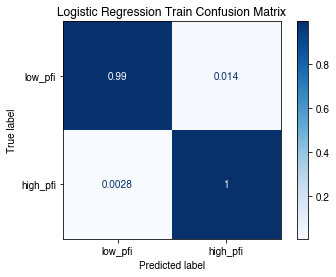

In [19]:
plot_cm(LR,X_t,y_t,'Logistic Regression Train Confusion Matrix', normalize="true");

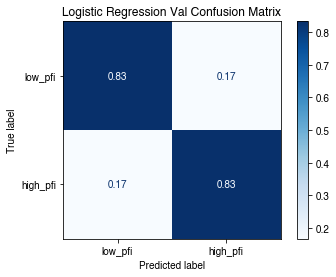

In [20]:
plot_cm(LR,X_v,y_v,'Logistic Regression Val Confusion Matrix', normalize="true");


# Cross Validation

In [21]:
from sklearn.model_selection import StratifiedKFold
# initialize stratified kfold cross validator
skf = StratifiedKFold(n_splits=10)
from sklearn import metrics

train_idx = []
val_idx = []
for train,val in skf.split(X_train,y_train):
    train_idx.append(train)
    val_idx.append(val)

In [22]:
# function for cross validation with a classifier object as input
def cv(clf):
    # initialize lists for each performance metric for plotting
    acc = []
    pre = []
    rec = []
    f1 = []
    # perform cross validation, changing indices of train and validation set in each iteration.
    for train_index, validation_index in skf.split(X_train, y_train):
        # set train and validation sets
        X, X_val = X_train.iloc[train_index], X_train.iloc[validation_index]
        y, y_val = np.array(y_train)[train_index], np.array(y_train)[validation_index]
        # train model
        clf.fit(X, y)
        # append metrics
        for x,y,data in [(X,y, 'Training'),(X_val,y_val,'Validation')]:
            y_pred = clf.predict(x)
            acc.append(metrics.accuracy_score(y,y_pred))
            pre.append(metrics.precision_score(y,y_pred))
            rec.append(metrics.recall_score(y,y_pred))
            f1.append(metrics.f1_score(y,y_pred))

    train_acc, train_pre, train_rec, train_f1 = np.mean(acc[::2]), np.mean(pre[::2]), np.mean(rec[::2]), np.mean(f1[::2])
    val_acc, val_pre, val_rec, val_f1 = np.mean(acc[1::2]), np.mean(pre[1::2]), np.mean(rec[1::2]), np.mean(f1[1::2])
    metric_df = pd.DataFrame({'accuracy':[train_acc,val_acc],
                            'precision':[train_pre,val_pre],
                            'recall':[train_rec,val_rec],
                            'f1 score':[train_f1,val_f1]}, index=['training','validation'])
    return (metric_df)


In [86]:
from sklearn.inspection import permutation_importance
# feature importance wrapper function
def feat_importance(clf,X,y,title,save=True,method='perm', fitted=False):
    if fitted==False:
        clf.fit(X,y)
    if method=='perm':
        perm_importance = permutation_importance(clf, X, y,random_state=0,scoring='f1')
        sorted_idx = perm_importance.importances_mean.argsort()[::-1]
        sorted_df = pd.DataFrame({'gene':X.columns[sorted_idx], 'importance':perm_importance.importances_mean[sorted_idx]})
        sorted_df.to_csv("../../prognostic_ML_classifier/batch_corrected/"+ title.replace(' ','_')+".csv")
        sorted_idx = perm_importance.importances_mean.argsort()[-20:]
        plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
        plt.xlabel("Permutation Importance")
    elif method=='builtin':
        sorted_idx = clf.feature_importances_.argsort()[-20:]
        plt.xlabel("Feature Importance")
        plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
    plt.title(title)
    if save:
        plt.savefig("../../prognostic_ML_classifier/batch_corrected/"+ title.replace(' ','_')+".png",dpi=300)
    plt.close()
    return X.columns[sorted_idx]

In [24]:
cv(LR)
    

,accuracy,precision,recall,f1 score
training,0.979824,0.975105,0.988384,0.981692
validation,0.848194,0.870559,0.852273,0.859002


In [25]:
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.8663366336633663

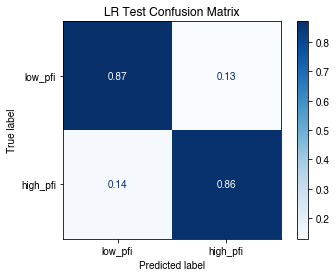

In [26]:
plot_cm(LR,X_test,y_test,'LR Test Confusion Matrix',normalize='true');

In [27]:
# alternate cv method
from sklearn import metrics
from sklearn.model_selection import cross_validate
metrics_dict = {'accuracy': metrics.make_scorer(metrics.accuracy_score),
           'precision': metrics.make_scorer(metrics.precision_score),
           'recall': metrics.make_scorer(metrics.recall_score),
           'f1': metrics.make_scorer(metrics.f1_score)}

In [28]:
cv_LR = pd.DataFrame(cross_validate(LR,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_LR.loc['Average'] = cv_LR.apply(np.mean,axis=0)
cv_LR

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.060944,0.005108,0.901235,0.909091,0.909091,0.909091
1,0.046137,0.004714,0.827160,0.857143,0.818182,0.837209
2,0.049255,0.004434,0.864198,0.883721,0.863636,0.873563
3,0.050312,0.004537,0.851852,0.880952,0.840909,0.860465
4,0.051042,0.004712,0.812500,0.914286,0.727273,0.810127
5,0.055165,0.004586,0.787500,0.864865,0.727273,0.790123
6,0.055288,0.004837,0.812500,0.784314,0.909091,0.842105
7,0.047606,0.004642,0.900000,0.909091,0.909091,0.909091
8,0.051771,0.004884,0.837500,0.829787,0.886364,0.857143
9,0.055855,0.004636,0.887500,0.872340,0.931818,0.901099


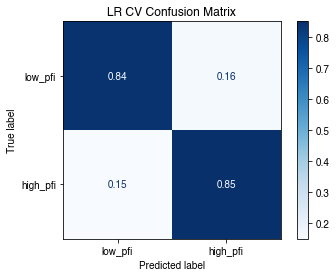

In [29]:
plot_cm(LR,X_train,y_train,'LR CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');

# Scaled Logistic Regression

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [31]:
LR_scaled = make_pipeline(StandardScaler(),LR)


In [32]:
LR_scaled

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [33]:
cv_LR_scaled = pd.DataFrame(cross_validate(LR_scaled,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_LR_scaled.loc['Average'] = cv_LR_scaled.apply(np.mean,axis=0)
cv_LR_scaled

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.052059,0.005073,0.864198,0.902439,0.840909,0.870588
1,0.037414,0.004692,0.827160,0.840909,0.840909,0.840909
2,0.037204,0.004590,0.851852,0.880952,0.840909,0.860465
3,0.038573,0.004557,0.851852,0.900000,0.818182,0.857143
4,0.042560,0.004609,0.837500,0.918919,0.772727,0.839506
5,0.037323,0.004620,0.812500,0.914286,0.727273,0.810127
6,0.038263,0.004559,0.837500,0.803922,0.931818,0.863158
7,0.038393,0.004570,0.850000,0.863636,0.863636,0.863636
8,0.039215,0.004567,0.812500,0.808511,0.863636,0.835165
9,0.038775,0.005060,0.862500,0.851064,0.909091,0.879121


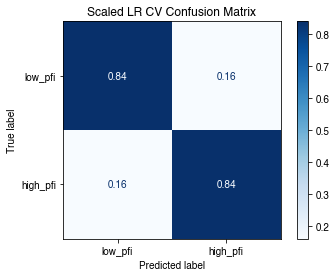

In [34]:
plot_cm(LR_scaled, X_train, y_train, 'Scaled LR CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/LR_CV_cm.png', dpi=300)

In [35]:
LR_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    LR_scaled_topfeats = feat_importance(LR_scaled, X_train.iloc[i,], y_train.iloc[i,],
                                     'LR Validation F1 Top Feature Importance',save=save)
    LR_topfeats_dict[idx] = LR_scaled_topfeats.sort_values()

In [36]:
LR_topfeats_dict

{0: Index(['ARRB1', 'ATRX', 'ATXN7L3', 'CHD5', 'DDB2', 'DOT1L', 'EYA1', 'GADD45A',
        'HMGN2', 'RBBP7', 'SATB2', 'SP100', 'TAF9', 'TET2', 'TLE2', 'TRIM16',
        'UBE2T', 'UCHL5', 'UHRF1', 'ZNF532'],
       dtype='object'),
 1: Index(['ATRX', 'ATXN7L3', 'CHD5', 'DOT1L', 'EYA1', 'GADD45A', 'HMGN2', 'KDM6A',
        'L3MBTL4', 'NFYB', 'PRKAB1', 'RBBP7', 'SATB2', 'SP100', 'TAF9', 'TLE2',
        'TRIM16', 'TTK', 'UBE2T', 'ZNF532'],
       dtype='object'),
 2: Index(['ARRB1', 'ATRX', 'ATXN7L3', 'CHD5', 'DDB2', 'DOT1L', 'ELP3', 'EYA1',
        'GADD45A', 'HMGN2', 'PRKAG2', 'RBBP7', 'SATB2', 'SP100', 'TAF9', 'TET2',
        'TLE2', 'TRIM16', 'UCHL5', 'ZNF532'],
       dtype='object'),
 3: Index(['ARRB1', 'ATRX', 'ATXN7L3', 'CHD5', 'DDB2', 'DOT1L', 'EYA1', 'GADD45A',
        'HMGN2', 'RBBP7', 'SATB2', 'SP100', 'TAF9', 'TET2', 'TLE2', 'TRIM16',
        'UBE2T', 'UCHL5', 'UHRF1', 'ZNF532'],
       dtype='object'),
 4: Index(['ATRX', 'ATXN7L3', 'CHD5', 'DDB2', 'DOT1L', 'EYA1', 'GADD45A', 

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
cv(RF)

,accuracy,precision,recall,f1 score
training,1.000000,1.000000,1.000,1.000000
validation,0.881759,0.906378,0.875,0.889547


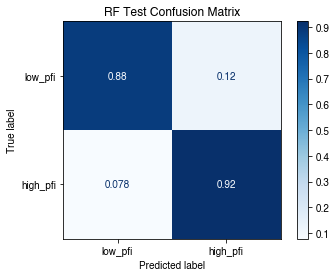

In [38]:
RF.fit(X_train,y_train)
plot_cm(RF,X_test,y_test,'RF Test Confusion Matrix',normalize='true');

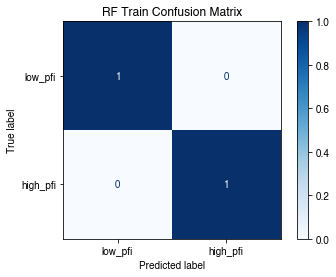

In [39]:
plot_cm(RF,X_train,y_train,'RF Train Confusion Matrix',normalize='true');

In [40]:
cv_RF = pd.DataFrame(cross_validate(RF,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_RF.loc['Average'] = cv_RF.apply(np.mean,axis=0)
cv_RF

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.521016,0.014459,0.901235,0.909091,0.909091,0.909091
1,0.436404,0.014605,0.814815,0.853659,0.795455,0.823529
2,0.447957,0.014293,0.950617,0.954545,0.954545,0.954545
3,0.442261,0.014025,0.925926,0.952381,0.909091,0.930233
4,0.439488,0.014084,0.900000,0.891304,0.931818,0.911111
5,0.435223,0.014298,0.862500,0.945946,0.795455,0.864198
6,0.434649,0.014327,0.900000,0.928571,0.886364,0.906977
7,0.433095,0.014064,0.825000,0.875000,0.795455,0.833333
8,0.434329,0.014292,0.862500,0.883721,0.863636,0.873563
9,0.431470,0.014359,0.875000,0.869565,0.909091,0.888889


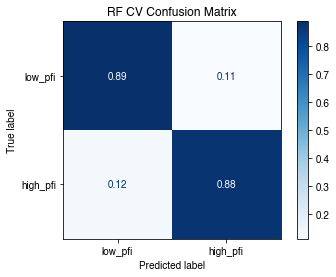

In [41]:
plot_cm(RF,X_train,y_train,'RF CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/RF_CV_cm.png', dpi=300)

In [42]:
# feature importance
RF_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    RF_topfeats = feat_importance(RF, X_train.iloc[i,], y_train.iloc[i,],
                                     'RF Validation F1 Top Feature Importance',save=save,method='builtin')
    RF_topfeats_dict[idx] = RF_topfeats.sort_values()

In [43]:
RF_topfeats_dict

{0: Index(['APOBEC3C', 'ATRX', 'AURKB', 'CBX3', 'CBX4', 'CBX7', 'CDC6', 'CDK1',
        'EZH2', 'HJURP', 'PBK', 'PPARGC1A', 'RAD51', 'RAD54L', 'RBX1', 'RUVBL1',
        'TTK', 'UBE2T', 'VRK1', 'WHSC1'],
       dtype='object'),
 1: Index(['ASXL2', 'AURKB', 'CBX2', 'CBX3', 'CDK1', 'DNMT3A', 'HJURP', 'HMG20B',
        'KDM4B', 'L3MBTL4', 'MAZ', 'MINA', 'MSH6', 'PCGF5', 'PPARGC1A', 'PRKCA',
        'PRMT6', 'TOP2A', 'TTK', 'USP12'],
       dtype='object'),
 2: Index(['ASF1B', 'AURKA', 'AURKB', 'BUB1', 'CDC6', 'CDK1', 'CHD9', 'CHEK1',
        'HJURP', 'KAT2B', 'L3MBTL4', 'PBK', 'PCNA', 'PRKAG2', 'RAD54L', 'RCC1',
        'TOP2A', 'UBE2T', 'ZMYND11', 'ZNF516'],
       dtype='object'),
 3: Index(['ARNTL', 'ARRB1', 'ASF1B', 'AURKB', 'BUB1', 'CBX3', 'CDK1', 'EZH2',
        'FOXO1', 'HJURP', 'MAZ', 'RAD51', 'RAD54L', 'TLE4', 'TOP2A', 'TTK',
        'UBE2T', 'WDR77', 'ZMYND11', 'ZNF516'],
       dtype='object'),
 4: Index(['ASF1B', 'BUB1', 'CBX7', 'FBRSL1', 'FOXO1', 'FOXP2', 'HAT1', 'HJURP',
    

# Support Vector Classifier

In [44]:
from sklearn.svm import SVC
SV = SVC(random_state=0)
cv(SV)

,accuracy,precision,recall,f1 score
training,0.918877,0.917192,0.936364,0.926655
validation,0.884198,0.885529,0.906818,0.895571


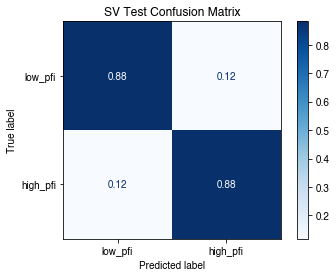

In [45]:
SV.fit(X_train,y_train)
plot_cm(SV, X_test, y_test, 'SV Test Confusion Matrix',normalize='true');

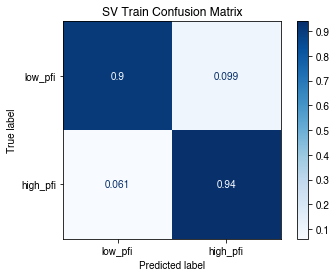

In [46]:
plot_cm(SV, X_train, y_train, 'SV Train Confusion Matrix',normalize='true');

In [47]:
cv_SV = pd.DataFrame(cross_validate(SV,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_SV.loc['Average'] = cv_SV.apply(np.mean,axis=0)
cv_SV

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.040554,0.011369,0.901235,0.928571,0.886364,0.906977
1,0.027527,0.010202,0.864198,0.851064,0.909091,0.879121
2,0.027580,0.010541,0.925926,0.931818,0.931818,0.931818
3,0.027680,0.010349,0.950617,0.934783,0.977273,0.955556
4,0.026920,0.010286,0.900000,0.891304,0.931818,0.911111
5,0.026324,0.010160,0.862500,0.883721,0.863636,0.873563
6,0.026731,0.010168,0.875000,0.869565,0.909091,0.888889
7,0.027156,0.010416,0.812500,0.808511,0.863636,0.835165
8,0.026847,0.010179,0.850000,0.880952,0.840909,0.860465
9,0.026998,0.010472,0.900000,0.875000,0.954545,0.913043


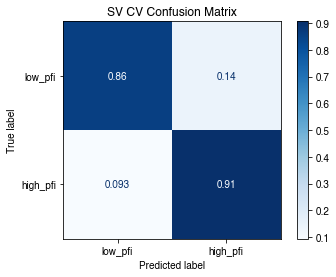

In [48]:
plot_cm(SV, X_train, y_train, 'SV CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');

## Try Feature Scaling for SVM

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [50]:
SV_scaled = make_pipeline(StandardScaler(),SV,)


In [51]:
SV_scaled

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [52]:
cv_SV_scaled = pd.DataFrame(cross_validate(SV_scaled,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_SV_scaled.loc['Average'] = cv_SV_scaled.apply(np.mean,axis=0)
cv_SV_scaled

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.049339,0.011432,0.938272,0.953488,0.931818,0.942529
1,0.031764,0.010350,0.888889,0.906977,0.886364,0.896552
2,0.030587,0.010503,0.975309,0.977273,0.977273,0.977273
3,0.030628,0.010595,0.938272,0.933333,0.954545,0.943820
4,0.030601,0.010154,0.925000,0.931818,0.931818,0.931818
5,0.029806,0.010155,0.887500,0.926829,0.863636,0.894118
6,0.030399,0.010343,0.912500,0.877551,0.977273,0.924731
7,0.030609,0.010527,0.862500,0.883721,0.863636,0.873563
8,0.029862,0.010313,0.912500,0.930233,0.909091,0.919540
9,0.031023,0.010323,0.925000,0.880000,1.000000,0.936170


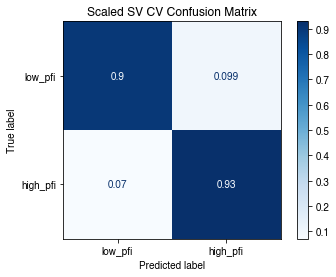

In [53]:
plot_cm(SV_scaled, X_train, y_train, 'Scaled SV CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/SV_CV_cm.png', dpi=300)

In [54]:
# feature importance
SV_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    SV_scaled_topfeats = feat_importance(SV_scaled, X_train.iloc[i,], y_train.iloc[i,],
                                     'SV Validation F1 Top Feature Importance',save=save)
    SV_topfeats_dict[idx] = SV_scaled_topfeats.sort_values()

In [55]:
SV_topfeats_dict

{0: Index(['ARRB1', 'ATRX', 'ATXN7L3', 'BRE', 'CHD5', 'DDB2', 'DOT1L', 'EYA1',
        'GADD45A', 'HMGN2', 'PARP3', 'RBBP7', 'SATB2', 'SP100', 'TAF9', 'TET2',
        'TLE2', 'TRIM16', 'UCHL5', 'ZNF532'],
       dtype='object'),
 1: Index(['ATAD2', 'BRMS1L', 'CBX7', 'CDK17', 'CECR2', 'CIT', 'DOT1L', 'GADD45A',
        'HCFC2', 'HDAC6', 'MDC1', 'NPM2', 'PRDM11', 'PRKAB1', 'PRKDC',
        'SMARCA1', 'SMYD2', 'SS18L1', 'TRIM24', 'ZHX1'],
       dtype='object'),
 2: Index(['ARRB1', 'CBX3', 'CHEK1', 'CRB2', 'DOT1L', 'ELP3', 'GADD45G', 'GATAD1',
        'GTF3C4', 'HDAC11', 'HDAC6', 'INO80E', 'NAP1L2', 'NASP', 'NPAS2',
        'SETD7', 'SMARCA1', 'UCHL5', 'YEATS4', 'ZGPAT'],
       dtype='object'),
 3: Index(['ATRX', 'ATXN7L3', 'BRE', 'CHD5', 'DOT1L', 'EYA1', 'FOXP1', 'GADD45A',
        'GATAD1', 'HMGN2', 'INO80E', 'NEK6', 'RBBP7', 'SATB2', 'SP100', 'TAF9',
        'TET2', 'TRIM16', 'YEATS2', 'ZNF532'],
       dtype='object'),
 4: Index(['A1CF', 'ACTL6A', 'AURKA', 'CDK17', 'CRB2', 'DEK', 'DZ

# XG Boost

In [56]:
from xgboost import XGBClassifier
import shap

In [57]:
xgb = XGBClassifier(n_estimators=100,random_state=0)


In [58]:
cv_xgb = pd.DataFrame(cross_validate(xgb,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_xgb.loc['Average'] = cv_xgb.apply(np.mean,axis=0)
cv_xgb

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.662058,0.016003,0.888889,0.906977,0.886364,0.896552
1,0.610255,0.009473,0.888889,0.906977,0.886364,0.896552
2,0.676255,0.010205,0.975309,0.956522,1.000000,0.977778
3,0.612518,0.009536,0.888889,0.906977,0.886364,0.896552
4,0.587595,0.009253,0.900000,0.928571,0.886364,0.906977
5,0.593702,0.009189,0.887500,0.972973,0.818182,0.888889
6,0.596450,0.009230,0.925000,0.895833,0.977273,0.934783
7,0.577469,0.009509,0.887500,0.888889,0.909091,0.898876
8,0.594357,0.009494,0.850000,0.863636,0.863636,0.863636
9,0.584393,0.009257,0.912500,0.893617,0.954545,0.923077


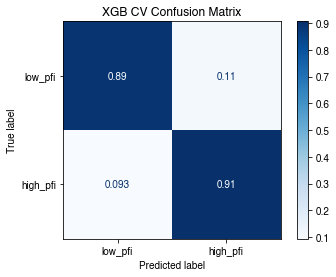

In [59]:
plot_cm(xgb, X_train, y_train, 'XGB CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/XGB_CV_cm.png', dpi=300)

In [60]:
# feature importance
XGB_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    XGB_topfeats = feat_importance(xgb, X_train.iloc[i,], y_train.iloc[i,],
                                     'XGB Validation F1 Top Feature Importance',save=save,method='builtin')
    XGB_topfeats_dict[idx] = XGB_topfeats.sort_values()

In [61]:
XGB_topfeats_dict

{0: Index(['APBB1', 'AURKB', 'CBX4', 'CBX7', 'CDK1', 'CECR2', 'CSRP2BP', 'EZH2',
        'FBRSL1', 'FOXP1', 'HCFC2', 'KDM4B', 'MAZ', 'MBD3', 'PBK', 'PPARGC1A',
        'RARA', 'SMYD2', 'TOP2A', 'ZNF516'],
       dtype='object'),
 1: Index(['AURKA', 'AURKB', 'BRMS1L', 'EYA4', 'EZH2', 'FOXP2', 'GATAD1', 'HDAC11',
        'IKZF3', 'KDM4B', 'L3MBTL4', 'MAPKAPK3', 'NASP', 'PRKAB1', 'SHPRH',
        'SMARCA1', 'TOP2A', 'UBE2T', 'USP12', 'ZNF532'],
       dtype='object'),
 2: Index(['ARRB1', 'ASF1B', 'BAZ1A', 'BRE', 'CBX3', 'CHEK1', 'DDB2', 'ELP3',
        'EYA1', 'FOXO1', 'GATAD1', 'HJURP', 'L3MBTL4', 'MINA', 'MOV10', 'PCNA',
        'PRDM16', 'RCC1', 'TLE1', 'YEATS4'],
       dtype='object'),
 3: Index(['CDK17', 'CHD5', 'CHD9', 'CHEK1', 'DEK', 'FOXO1', 'FOXP1', 'GADD45B',
        'HELLS', 'HJURP', 'HMGN2', 'IKZF3', 'INO80E', 'PRDM11', 'PRDM16',
        'RAD51', 'RAD54L', 'SETD7', 'SMARCA2', 'USP46'],
       dtype='object'),
 4: Index(['BRCA1', 'CBX4', 'DDB2', 'FAM175A', 'HMG20B', 'L3MBTL4',

# Best Model: Scaled SVM

In [62]:
SV_scaled.fit(X_train,y_train)
SV_scaled.score(X_test,y_test)

0.9257425742574258

In [63]:
metrics.f1_score(y_test,SV_scaled.predict(X_test))


0.9268292682926829

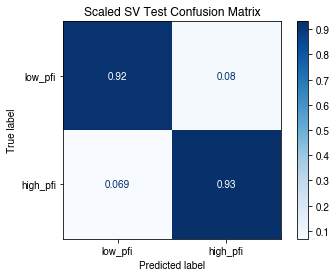

In [64]:
plot_cm(SV_scaled, X_test, y_test, 'Scaled SV Test Confusion Matrix',normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/SV_Test_cm.png', dpi=300)

## Shap feature importance

In [65]:
import shap

In [66]:
X_test.shape

(202, 198)

In [67]:
# explain all the predictions in the test set
# explainer = shap.KernelExplainer(SV_scaled.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [68]:
np.random.seed(42)
explainer = shap.KernelExplainer(SV_scaled.predict, X_test, )

X does not have valid feature names, but StandardScaler was fitted with feature names
Using 202 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [69]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/202 [00:00<?, ?it/s]

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale 

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

In [70]:
shap_values

array([[-2.52974071e-03, -3.40353144e-03,  7.02464020e-03, ...,
        -2.82734404e-03,  0.00000000e+00,  1.40559026e-02],
       [ 2.21974633e-03,  2.15555219e-03, -1.16468639e-02, ...,
         7.72739938e-03,  6.03366203e-03, -1.79525525e-03],
       [ 9.59145916e-05,  0.00000000e+00, -7.09057810e-03, ...,
        -3.07756553e-03,  7.20647841e-05,  3.25996007e-03],
       ...,
       [ 0.00000000e+00,  1.74444886e-02,  3.48499990e-03, ...,
         9.39534832e-03, -5.94888202e-03,  0.00000000e+00],
       [-1.71176410e-03,  0.00000000e+00, -5.13258225e-03, ...,
        -2.35254210e-03, -1.54765847e-03, -3.33085791e-03],
       [-4.40526177e-03,  9.18791314e-03, -3.94365807e-03, ...,
         0.00000000e+00,  4.02742546e-03, -8.45383490e-03]])

In [71]:
sorted_idx = shap_values.argsort()
# plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

In [72]:
feature_names = X_train.columns
res = pd.DataFrame(shap_values, columns = feature_names)
vals = np.abs(res.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance = shap_importance.reset_index(drop=True)
shap_importance

,col_name,feature_importance_vals
0,L3MBTL4,0.023658
1,HJURP,0.021262
2,PPARGC1A,0.020492
3,FOXP4,0.019969
4,TOP2A,0.019910
...,...,...
193,MST1,0.004017
194,EXOSC4,0.004007
195,TP53,0.003973
196,SFMBT2,0.003946


In [73]:
shap_importance.to_csv('../../prognostic_ML_classifier/batch_corrected/top_shap_feature_SV.csv',index=False)

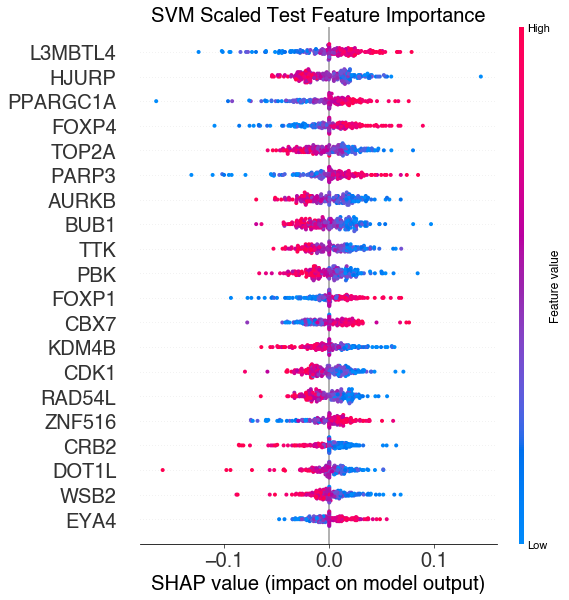

In [74]:
p=plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Make the modifications that you want
ax.set_title('SVM Scaled Test Feature Importance', fontdict={"size":20})
ax.tick_params(labelsize=20)
ax.set_xlabel(ax.get_xlabel(),fontsize=20);

p.savefig('../../prognostic_ML_classifier/batch_corrected/SV_test_shap_summary.png',  bbox_inches='tight', facecolor='white', dpi=300)

Feature importance: Variables are ranked in descending order.

Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

Correlation: Expression of MRGBP is negatively correlated with pfi prognosis.

In [87]:
# permutation feature importance
SV_scaled_topfeats_test = feat_importance(SV_scaled, X_test, y_test,
                                          'SV Test F1 Top Feature Importance',save=True,fitted=True)

In [83]:
SV_scaled_topfeats_test

Index(['PHF8', 'ZBTB7C', 'SNAI2', 'UHRF1', 'RAD54L', 'WSB2', 'RBBP7', 'CIT',
       'TTK', 'TLE4', 'BUB1', 'PPP4R2', 'HJURP', 'FOXP1', 'SATB1', 'AURKB',
       'NFYB', 'TOP2A', 'FOXP2', 'FOXP4'],
      dtype='object')

# Final RF

In [108]:
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.900990099009901

In [109]:
metrics.f1_score(y_test,RF.predict(X_test))


0.8936170212765957

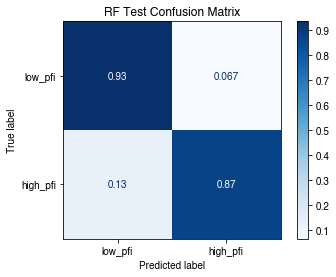

In [110]:
plot_cm(RF, X_test, y_test, 'RF Test Confusion Matrix',normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/RF_Test_cm.png', dpi=300)

In [111]:
RF_topfeats_test = feat_importance(RF, X_test, y_test,
                                          'RF Test F1 Top Feature Importance',save=True, method='builtin',fitted=True)

In [112]:
RF_topfeats_test

Index(['PARP3', 'FOXO1', 'MAZ', 'ANP32E', 'RUVBL1', 'CBX7', 'BUB1', 'PBK',
       'RAD51', 'CHEK1', 'TOP2A', 'PPARGC1A', 'ASF1B', 'L3MBTL4', 'TTK',
       'EZH2', 'CDK1', 'AURKB', 'HJURP', 'RAD54L'],
      dtype='object')

# Final XGB

In [113]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)


0.8811881188118812

In [114]:
metrics.f1_score(y_test,xgb.predict(X_test))


0.8775510204081632

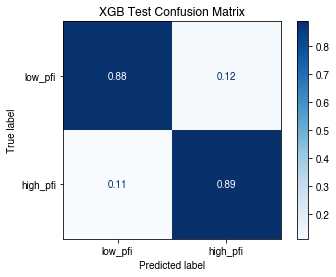

In [115]:
plot_cm(xgb, X_test, y_test, 'XGB Test Confusion Matrix',normalize='true');
plt.savefig('../../prognostic_ML_classifier/batch_corrected/XGB_Test_cm.png', dpi=300)

In [116]:
XGB_topfeats_test = feat_importance(xgb, X_test, y_test,
                                          'XGB Test F1 Top Feature Importance',save=True, method='builtin',fitted=True)
XGB_topfeats_test

Index(['PPARGC1A', 'EYA2', 'TP53', 'CHEK1', 'EZH2', 'PRKAA2', 'WHSC1', 'TLE4',
       'PRKCA', 'ZNF711', 'FOXP4', 'PRDM16', 'CECR2', 'PPP4R2', 'L3MBTL4',
       'HJURP', 'SS18L1', 'TTK', 'TFPT', 'RAD54L'],
      dtype='object')

# compare misclassified patients across models

In [117]:
X_t, y_t, X_v, y_v = X_train.iloc[train_idx[0],], y_train.iloc[train_idx[0],], X_train.iloc[val_idx[0],], y_train.iloc[val_idx[0],]

{'FP': {'TCGA.38.4627.01A',
  'TCGA.BP.4977.01A',
  'TCGA.DU.6542.01A',
  'TCGA.OR.A5LS.01A'},
 'FN': {'TCGA.50.5051.01A',
  'TCGA.B5.A0JR.01A',
  'TCGA.J4.A83M.01A',
  'TCGA.OR.A5K4.01A'},
 'All': {'TCGA.38.4627.01A',
  'TCGA.50.5051.01A',
  'TCGA.B5.A0JR.01A',
  'TCGA.BP.4977.01A',
  'TCGA.DU.6542.01A',
  'TCGA.J4.A83M.01A',
  'TCGA.OR.A5K4.01A',
  'TCGA.OR.A5LS.01A'}}

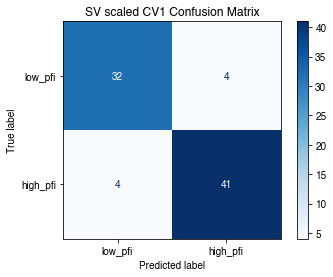

In [118]:
SV_scaled.fit(X_t, y_t)
SV_pred = SV_scaled.predict(X_v)
# SV_scaled_preddf = pd.DataFrame({'Patient':X_train.index[val_idx[0]],
#                            'Predict':SV_scaled.predict(X_train.iloc[val_idx[0],]),
#                            'Truth':y_train.iloc[val_idx[0],]})
SV_scaled_fpred = {'FP': set(y_v.index[np.where(SV_pred>y_v)]),
                   'FN': set(y_v.index[np.where(SV_pred<y_v)]),
                  'All': set(y_v.index[np.where(SV_pred!=y_v)])}
plot_cm(SV_scaled, X_v, y_v, 'SV scaled CV1 Confusion Matrix')
SV_scaled_fpred

{'FP': {'TCGA.BP.4977.01A',
  'TCGA.DU.6396.01A',
  'TCGA.DU.6542.01A',
  'TCGA.EJ.7314.01A'},
 'FN': {'TCGA.50.5051.01A',
  'TCGA.AA.3675.01A',
  'TCGA.B5.A0JR.01A',
  'TCGA.EJ.7327.01A',
  'TCGA.J4.A83M.01A',
  'TCGA.OR.A5K4.01A'},
 'All': {'TCGA.50.5051.01A',
  'TCGA.AA.3675.01A',
  'TCGA.B5.A0JR.01A',
  'TCGA.BP.4977.01A',
  'TCGA.DU.6396.01A',
  'TCGA.DU.6542.01A',
  'TCGA.EJ.7314.01A',
  'TCGA.EJ.7327.01A',
  'TCGA.J4.A83M.01A',
  'TCGA.OR.A5K4.01A'}}

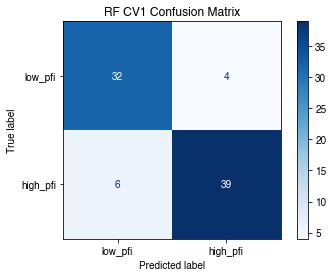

In [119]:
RF.fit(X_t,y_t)
RF_pred = RF.predict(X_v)
RF_fpred = {'FP': set(y_v.index[np.where(RF_pred>y_v)]),
            'FN': set(y_v.index[np.where(RF_pred<y_v)]),
           'All': set(y_v.index[np.where(RF_pred!=y_v)])}
plot_cm(RF,X_v,y_v,title='RF CV1 Confusion Matrix');
RF_fpred

{'FP': {'TCGA.BP.4977.01A',
  'TCGA.DU.6396.01A',
  'TCGA.DU.6542.01A',
  'TCGA.EJ.7314.01A',
  'TCGA.FG.8185.01A'},
 'FN': {'TCGA.50.5051.01A',
  'TCGA.B5.A0JR.01A',
  'TCGA.EJ.7327.01A',
  'TCGA.J4.A83M.01A',
  'TCGA.OR.A5K4.01A'},
 'All': {'TCGA.50.5051.01A',
  'TCGA.B5.A0JR.01A',
  'TCGA.BP.4977.01A',
  'TCGA.DU.6396.01A',
  'TCGA.DU.6542.01A',
  'TCGA.EJ.7314.01A',
  'TCGA.EJ.7327.01A',
  'TCGA.FG.8185.01A',
  'TCGA.J4.A83M.01A',
  'TCGA.OR.A5K4.01A'}}

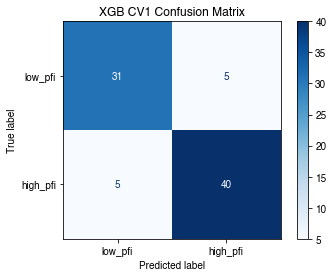

In [120]:
xgb.fit(X_t,y_t)
xgb_pred = xgb.predict(X_v)
xgb_fpred = {'FP': set(y_v.index[np.where(xgb_pred>y_v)]),
            'FN': set(y_v.index[np.where(xgb_pred<y_v)]),
            'All': set(y_v.index[np.where(xgb_pred!=y_v)])}
plot_cm(xgb,X_v,y_v,title='XGB CV1 Confusion Matrix');
xgb_fpred

In [121]:
SV_scaled_fpred['All'].intersection(RF_fpred['All'])

{'TCGA.50.5051.01A',
 'TCGA.B5.A0JR.01A',
 'TCGA.BP.4977.01A',
 'TCGA.DU.6542.01A',
 'TCGA.J4.A83M.01A',
 'TCGA.OR.A5K4.01A'}

In [122]:
SV_scaled_fpred['All'].intersection(xgb_fpred['All'])

{'TCGA.50.5051.01A',
 'TCGA.B5.A0JR.01A',
 'TCGA.BP.4977.01A',
 'TCGA.DU.6542.01A',
 'TCGA.J4.A83M.01A',
 'TCGA.OR.A5K4.01A'}

In [123]:
xgb_fpred['All'].intersection(RF_fpred['All'])

{'TCGA.50.5051.01A',
 'TCGA.B5.A0JR.01A',
 'TCGA.BP.4977.01A',
 'TCGA.DU.6396.01A',
 'TCGA.DU.6542.01A',
 'TCGA.EJ.7314.01A',
 'TCGA.EJ.7327.01A',
 'TCGA.J4.A83M.01A',
 'TCGA.OR.A5K4.01A'}

In [124]:
mc = xgb_fpred['All'].intersection(RF_fpred['All']).intersection(SV_scaled_fpred['All'])

In [125]:
model_pred_df = pd.DataFrame({'Patient': y_v.index,
                           'SV_scaled_pred': SV_pred,
                           'RF_pred': RF_pred,
                           'XGB_pred': xgb_pred,
                             'Truth': y_v})

In [126]:
model_pred_df

,Patient,SV_scaled_pred,RF_pred,XGB_pred,Truth
TCGA.DU.6542.01A,TCGA.DU.6542.01A,1,1,1,0
TCGA.KK.A8I6.01A,TCGA.KK.A8I6.01A,0,0,0,0
TCGA.EJ.A8FS.01A,TCGA.EJ.A8FS.01A,0,0,0,0
TCGA.YL.A8SC.01A,TCGA.YL.A8SC.01A,0,0,0,0
TCGA.FG.7636.01A,TCGA.FG.7636.01A,1,1,1,1
...,...,...,...,...,...
TCGA.FV.A2QR.01A,TCGA.FV.A2QR.01A,1,1,1,1
TCGA.44.7670.01A,TCGA.44.7670.01A,0,0,0,0
TCGA.CC.A7IK.01A,TCGA.CC.A7IK.01A,0,0,0,0
TCGA.FC.A4JI.01A,TCGA.FC.A4JI.01A,0,0,0,0


In [127]:
from matplotlib_venn import venn3, venn3_unweighted
from matplotlib import pyplot as plt

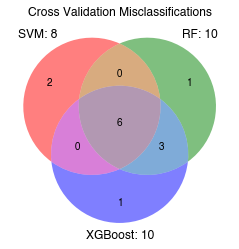

In [128]:
# depict venn diagram
# venn3(subsets=(20, 10, 12, 10, 9, 4, 3), 
#       set_labels=('Group A', 'Group B', 'Group C'), 
#       set_colors=("orange", "blue", "red"), alpha=0.7)
  
# # outline of circle line style and width
# venn3_circles(subsets=(20, 10, 12, 10, 9, 4, 3),
#               linestyle="dashed", linewidth=2)
venn3_unweighted(subsets=[SV_scaled_fpred['All'], RF_fpred['All'], xgb_fpred['All']],
     set_labels = ['SVM: %d'%len(SV_scaled_fpred['All']),'RF: %d'%len(RF_fpred['All']),'XGBoost: %d'%len(xgb_fpred['All'])],
      alpha=0.5)
# title of the venn diagram
plt.title("Cross Validation Misclassifications")
# plt.show()
plt.savefig('../../prognostic_ML_classifier/batch_corrected/missclass_venn.png', dpi=300)

In [136]:
SV_scaled_topfeats_test

Index(['ARRB1', 'IKZF3', 'NEK6', 'SIRT7', 'CBX4', 'FOXP4', 'ELP3', 'VDR',
       'RUVBL1', 'ZNF516', 'PRDM8', 'YEATS4', 'ANP32E', 'TLE4', 'KDM6A',
       'CBX7', 'L3MBTL4', 'JDP2', 'CBX2', 'KAT2A'],
      dtype='object')

In [137]:
RF_topfeats_test

Index(['PARP3', 'FOXO1', 'MAZ', 'ANP32E', 'RUVBL1', 'CBX7', 'BUB1', 'PBK',
       'RAD51', 'CHEK1', 'TOP2A', 'PPARGC1A', 'ASF1B', 'L3MBTL4', 'TTK',
       'EZH2', 'CDK1', 'AURKB', 'HJURP', 'RAD54L'],
      dtype='object')

In [138]:
XGB_topfeats_test

Index(['PPARGC1A', 'EYA2', 'TP53', 'CHEK1', 'EZH2', 'PRKAA2', 'WHSC1', 'TLE4',
       'PRKCA', 'ZNF711', 'FOXP4', 'PRDM16', 'CECR2', 'PPP4R2', 'L3MBTL4',
       'HJURP', 'SS18L1', 'TTK', 'TFPT', 'RAD54L'],
      dtype='object')

In [139]:
feature_df = pd.DataFrame({'Feature': list(SV_scaled_topfeats_test)+ list(RF_topfeats_test) + list(XGB_topfeats_test),
             'Model': ['SV']*len(SV_scaled_topfeats_test)+['RF']*len(RF_topfeats_test)+['XGB']*len(XGB_topfeats_test)})

In [140]:
feature_df.to_csv('../../prognostic_ML_classifier/batch_corrected/top_feature_SV_RF_XGB.csv',index=False)

# Prediction on PAAD

In [155]:
# read in labels (pfi group) and features (gene expression)
project='TCGA'
# pfi_df = pd.DataFrame(columns=['Cancer','Group'])
gene_exp = pd.DataFrame(columns=unique_nmf_genes)

cluster_file='../../%s_%s/supplemental/Tan_PDAC_supplemental2.xlsx'%(project,'PAAD')
cluster_df = pd.read_excel(cluster_file, sheet_name='Cluster assignments',skiprows=[0])[['TCGA_patient_id','IR']]
cluster_df
cluster_df['TCGA_patient_id'].str.strip()
cluster_df['TCGA_patient_id'] = cluster_df['TCGA_patient_id'].str.replace('-','.')+'.01A'
cluster_df
cluster_df['IR'].replace([1,2],['low_pfi','high_pfi'],inplace=True)
cluster_df['IR'] = label_binarize(cluster_df['IR'],classes=['low_pfi','high_pfi'])
recorded_patients = set(cluster_df['TCGA_patient_id']).intersection(set(gene_exp_full.index))
cluster_df.index = cluster_df['TCGA_patient_id']
# gene_file = '../../%s_%s/RNA-seq_datasets/%s_epigenes_log2norm_counts.csv'%(project,'PAAD','PAAD')
gene_df = gene_exp_full.loc[recorded_patients][unique_nmf_genes]
# gene_df = gene_df.loc[cluster_df['TCGA_patient_id']][unique_nmf_genes]

In [156]:
gene_df

,CBX4,CDK2,L3MBTL4,MASTL,BAZ1A,EYA4,TFPT,MBIP,TLE4,RAD51,...,GTF2I,TLE1,IKZF3,PCGF5,CBX6,ACTL6A,GADD45A,CECR2,CHD5,PHF19
TCGA.FB.A545.01A,9.48,9.45,5.49,8.29,10.34,3.63,8.83,8.94,8.29,6.91,...,10.83,10.31,2.47,9.79,8.09,9.82,10.34,2.47,4.32,9.63
TCGA.2L.AAQJ.01A,9.93,8.92,6.06,7.83,10.34,2.16,8.20,8.75,9.06,6.73,...,10.75,9.95,5.38,10.15,8.29,9.67,10.05,2.31,2.45,8.94
TCGA.FB.AAPS.01A,9.22,9.18,6.28,7.89,9.50,7.78,9.03,8.66,8.75,5.86,...,10.53,9.91,5.41,10.03,8.85,9.43,10.61,3.21,4.69,9.31
TCGA.2L.AAQA.01A,9.50,9.60,4.53,8.58,10.54,1.77,7.70,7.88,8.33,7.77,...,11.54,9.55,4.83,10.38,8.31,10.06,9.55,1.59,3.04,8.88
TCGA.2L.AAQE.01A,9.25,9.42,4.35,7.69,10.09,4.03,9.57,9.54,8.08,7.19,...,11.11,9.34,5.35,10.07,9.49,9.89,9.26,1.51,2.61,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.H6.8124.01A,9.29,10.11,4.59,7.80,10.14,8.28,8.97,10.25,8.18,6.75,...,11.63,9.45,2.84,10.11,9.24,10.12,10.56,3.21,4.35,8.55
TCGA.HZ.8005.01A,9.66,9.65,6.47,7.83,10.08,5.49,7.92,8.58,7.68,6.65,...,12.09,10.01,5.00,9.94,8.68,10.57,9.71,2.63,2.29,8.93
TCGA.IB.AAUO.01A,10.92,10.03,6.83,8.13,10.20,4.53,9.66,8.56,8.39,7.77,...,10.28,9.81,3.23,10.32,7.43,10.60,9.87,0.99,3.30,9.14
TCGA.FB.AAQ3.01A,7.98,9.35,6.42,8.01,9.48,4.07,8.74,10.18,8.05,7.26,...,8.14,10.24,2.25,10.77,6.04,10.10,10.12,1.32,2.46,8.65


In [157]:
SV_scaled.fit(X_train,y_train)
SV_scaled.score(gene_df,cluster_df['IR'])

0.5131578947368421

In [158]:
metrics.f1_score(cluster_df['IR'],SV_scaled.predict(gene_df))


0.39344262295081966

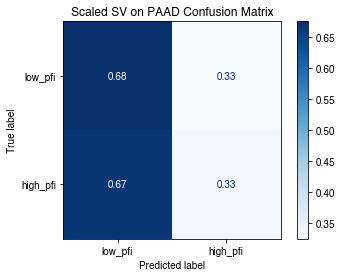

In [159]:
plot_cm(SV_scaled,gene_df,cluster_df['IR'],'Scaled SV on PAAD Confusion Matrix',normalize='true')
plt.savefig('../../prognostic_ML_classifier/batch_corrected/SV_PAAD_cm.png', dpi=300)

In [160]:
list(gene_df.columns) == list(X_train.columns)

True